In [3]:
import datetime
today = datetime.date.today()
date = str(today)

url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date

import pandas as pd
data = pd.read_excel(url)

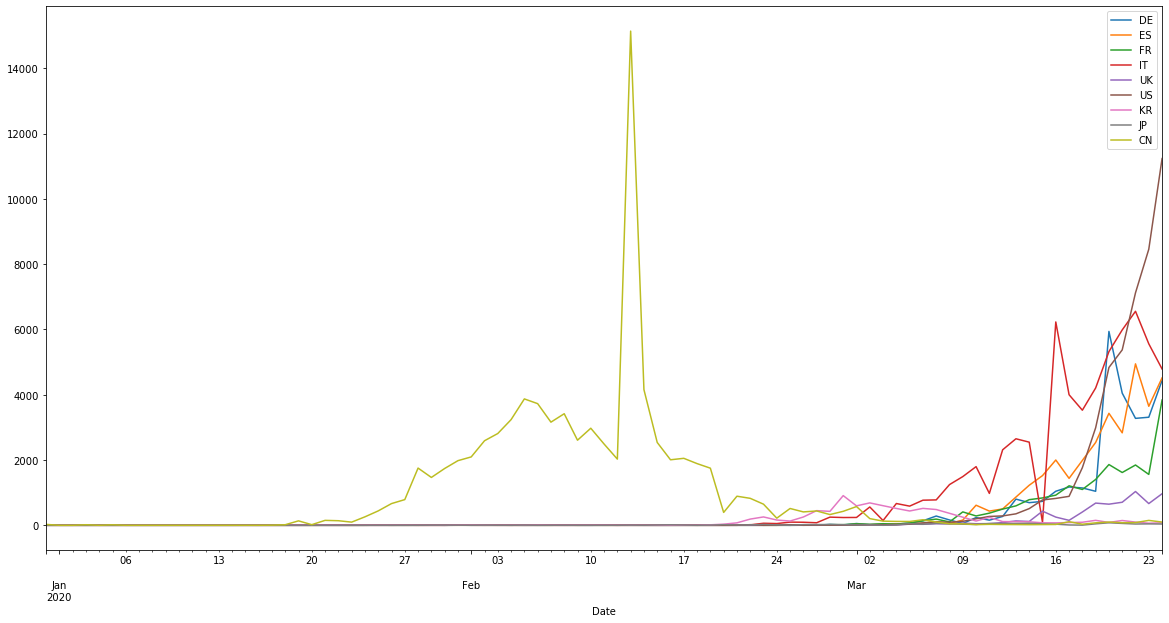

In [4]:
countries = ['DE', 'ES', 'FR', 'IT', 'UK', 'US', 'KR', 'JP', 'CN']

cases = pd.DataFrame(columns = ['Date'])

for country in countries:
    countryData = data[data['GeoId'] == country][['DateRep', 'Cases']]
    countryData.columns = ['Date', country]
    cases = pd.merge(cases, countryData, on='Date', how='right')

cases = cases.sort_values(by=['Date'])

cases.plot.line(x='Date', y=countries, figsize=(20, 10))

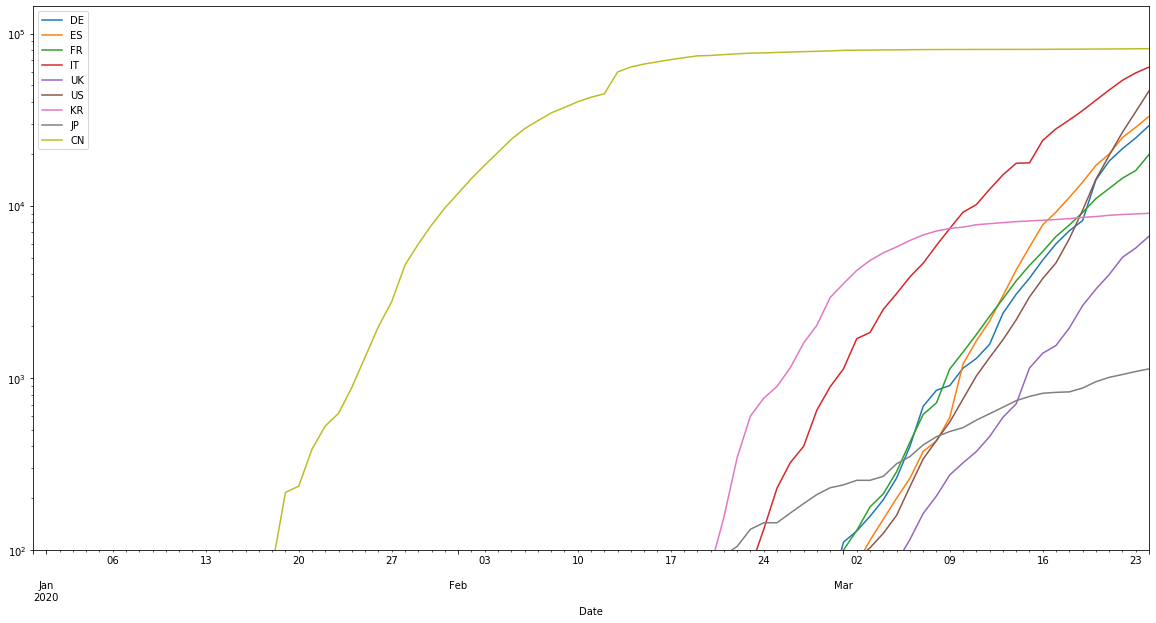

In [5]:
a = cases[countries].to_numpy()

for i in range(1, cases.shape[0]):
    a[i] = a[i] + a[i - 1]

sumCases = pd.DataFrame(data=a, index=cases['Date'], columns=countries)

sumCases.plot.line(logy=True, figsize=(20, 10), ylim=(100, None))